This is the notebook at which we had the discussion with Marco about what VANS discovers for XXZ model, on Febrauray 17th 2021. The algorithm travels through states that present a magnetization symmetry; while ground and first-excited states have global magnetization equal to zero, local properties differ (first excited present a "flipped configuration" - not sure which a good name for that is - ), which are (more) easily prepared with local transformations compared with the true ground state, which demands a highly no local transformation. VANS navigate the profile of symmetries.

In [124]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import sys
from tqdm import tqdm
#sys.path[0] = "/home/cooper-cooper/Desktop/vans/"
from utilities.evaluator import Evaluator
import os
from utilities.misc import compute_ground_energy
from utilities.variational import VQE
import cirq
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
values = pd.read_csv('results/xxz/plot/xxz10first_14.csv',delimiter=",",header=None)

In [137]:
def give_eigens(aaa, index):
    f = aaa[1].to_numpy()[index]
    f = f.replace("{","")
    f = f.replace("}","")
    f = f.replace("\'","")
    return [float(kk.replace(",","")) for kk in f.split()]

In [149]:
eigens={}
for ind,j in enumerate(tqdm(js)):#5.1,0.1)):
    eigens[j] = np.sort(give_eigens(values,ind))[:3]
    

100%|██████████| 41/41 [00:00<00:00, 8831.93it/s]


In [128]:
js = values[0].to_numpy()

vansenergies=[]
eigens = {}

energies = []
# #
for ind,j in enumerate(tqdm(js)):#5.1,0.1)):
    eigens[j] = give_eigens(values,ind)[:3]
    
    args={"n_qubits":14,"problem_config":{"problem" : "XXZ", "g":1.0, "J": j}, "load_displaying":False,"specific_folder_name":"14Q - J {} g 1.0".format(np.round(j,3))}
    evaluator = Evaluator(args,loading=True, path="../data-vans/")
    vansenergies.append(evaluator.evolution[evaluator.get_best_iteration()][4])
    
    #vqe_handler = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"])
    #obs = vqe_handler.observable
    #eigs = compute_ground_energy(obs, vqe_handler.qubits)
    eigens[j] = give_eigens(values,ind)[:3]

    

100%|██████████| 41/41 [01:14<00:00,  1.82s/it]


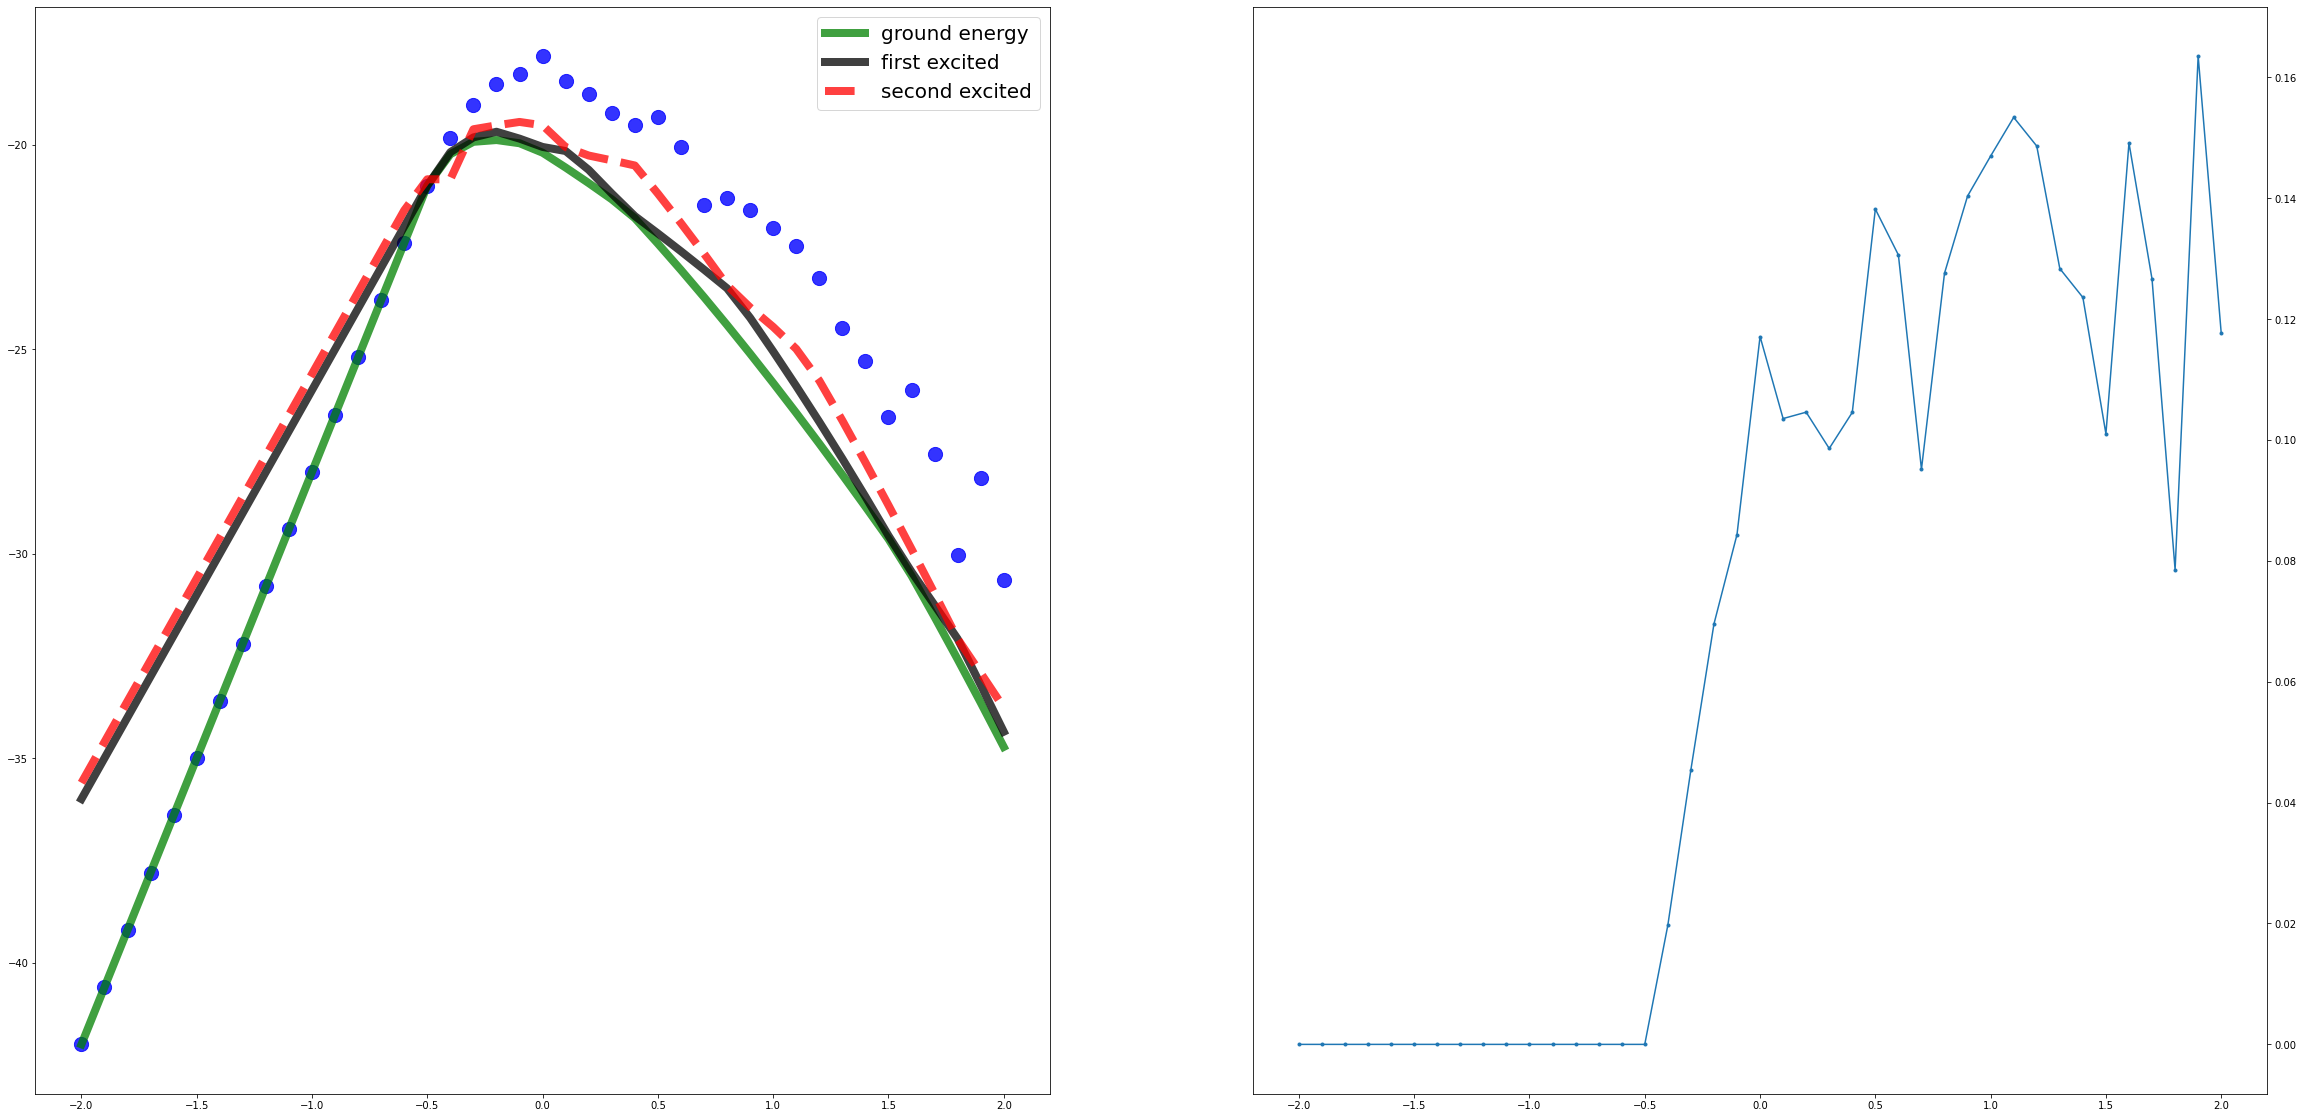

In [156]:
plt.figure(figsize=(40,20))
ax1=plt.subplot2grid((1,2),(0,0))
ax2=plt.subplot2grid((1,2),(0,1))

energies = np.array(vansenergies)

ge,ge1,ge2 = np.transpose(np.array(list(eigens.values())))
ge2[np.argmax(ge2)] = ge2[np.argmax(ge2)-1]
lw=8
ax1.scatter(js,np.array(energies),s=200, alpha=0.8, color="blue")
ax1.plot(js,np.array(ge), color="green",alpha=0.75, linewidth=lw, label="ground energy")
ax1.plot(js,np.array(ge1),color="black", alpha=0.75, linewidth=lw, label="first excited")
ax1.plot(js,np.array(ge2), '--',color="red",alpha=0.75, linewidth=lw, label="second excited")
#ax1.plot(js,np.array(ge3), '-.',color="red",alpha=0.75, linewidth=lw, label="third excited")
#ax1.plot(js,np.array(ge4), '--',color="red",alpha=0.75, linewidth=lw, label="third excited")

ax1.legend(prop={"size":20})
#for aut in zip([ge,ge1,ge2], ["first","second",]:
for aut in [ge]:
    ax2.plot(js, np.abs((aut-energies)/np.array(aut)),'.-')

#for ind,b in enumerate(energies):
#    ax2.bar(js[ind],(b-ge[ind])/np.abs(ge[ind]))
ax2.yaxis.tick_right() 
plt.savefig("xxz_14qubitsmarco.png")

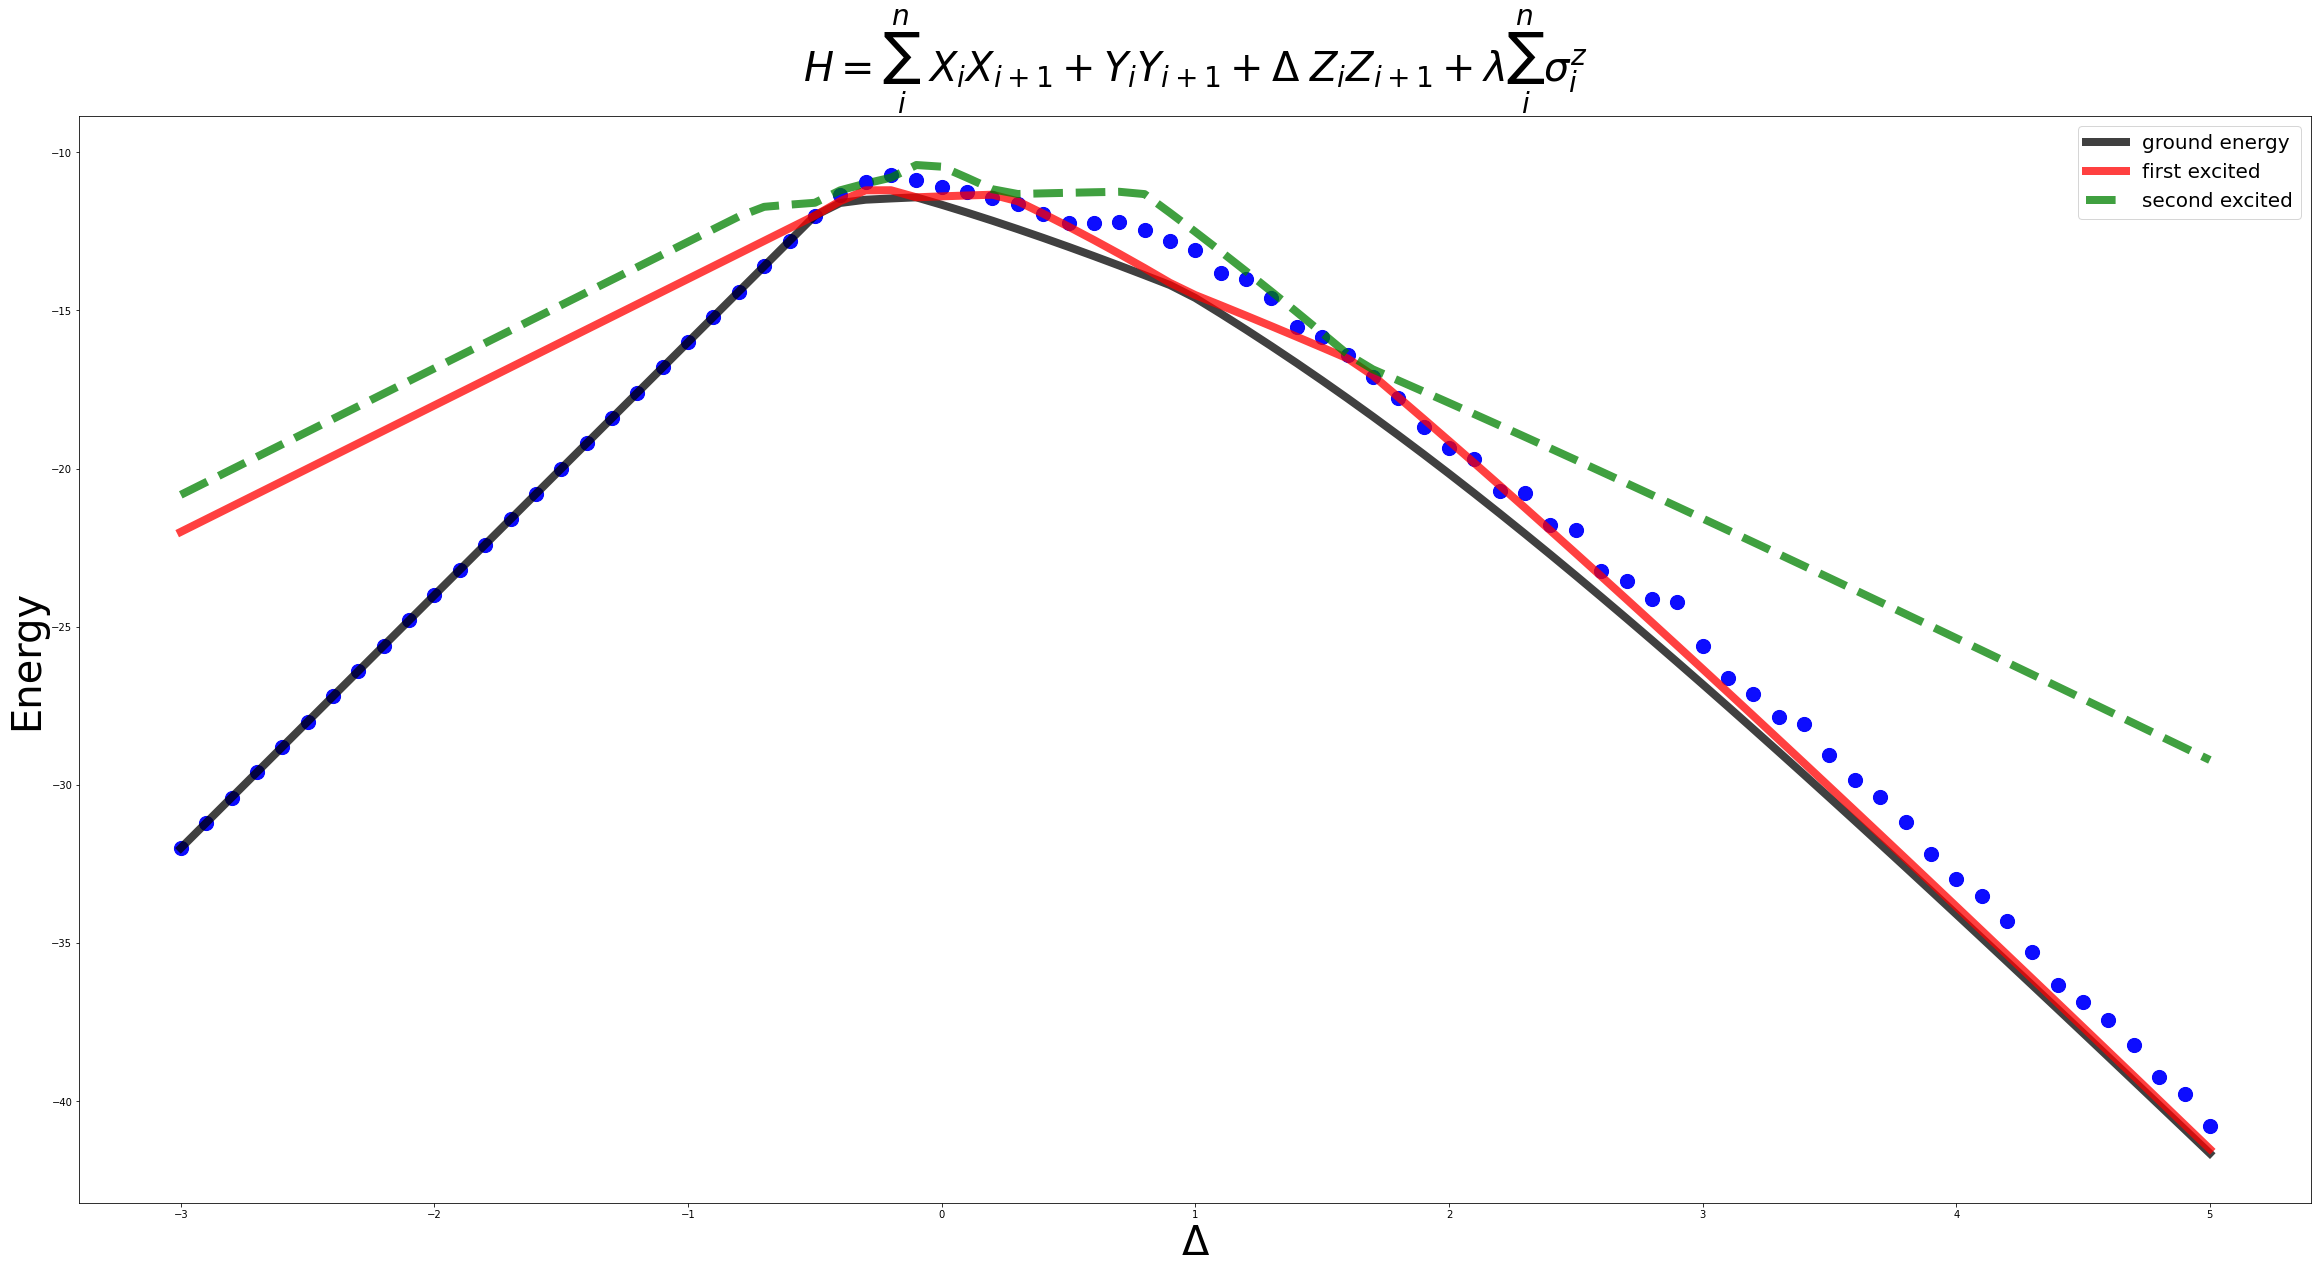

In [63]:
plt.figure(figsize=(40,20))
ax1=plt.subplot2grid((1,1),(0,0))
plt.title(r'$H = \sum_i^{n} \; X_i X_{i+1} + Y_i Y_{i+1} + \Delta \; Z_i Z_{i+1} + \lambda \sum_i^{n} \sigma_i^{z}$',size=40)
energies = np.array(vansenergies)

ge,ge1,ge2 = np.transpose(np.array(list(eigens.values())))

lw=8
ax1.scatter(js,np.array(energies),s=200, alpha=0.95, color="blue")
ax1.plot(js,np.array(ge), color="black",alpha=0.75, linewidth=lw, label="ground energy")
ax1.plot(js,np.array(ge1),color="red", alpha=0.75, linewidth=lw, label="first excited")
ax1.plot(js,np.array(ge2), '--',color="green",alpha=0.75, linewidth=lw, label="second excited")
ax1.legend(prop={"size":20})
#for aut in zip([ge,ge1,ge2], ["first","second",]:
#for aut in [ge]:
    #ax2.plot(js, np.abs((aut-energies)/np.array(aut)),'.-')

#for ind,b in enumerate(energies):
#    ax2.bar(js[ind],(b-ge[ind])/np.abs(ge[ind]))
#ax2.yaxis.tick_right() 
plt.xlabel(r'$\Delta$',size=40)
plt.ylabel(r'Energy',size=40)
plt.savefig("results/xxz/xxz_8qubitsmarco1.png")

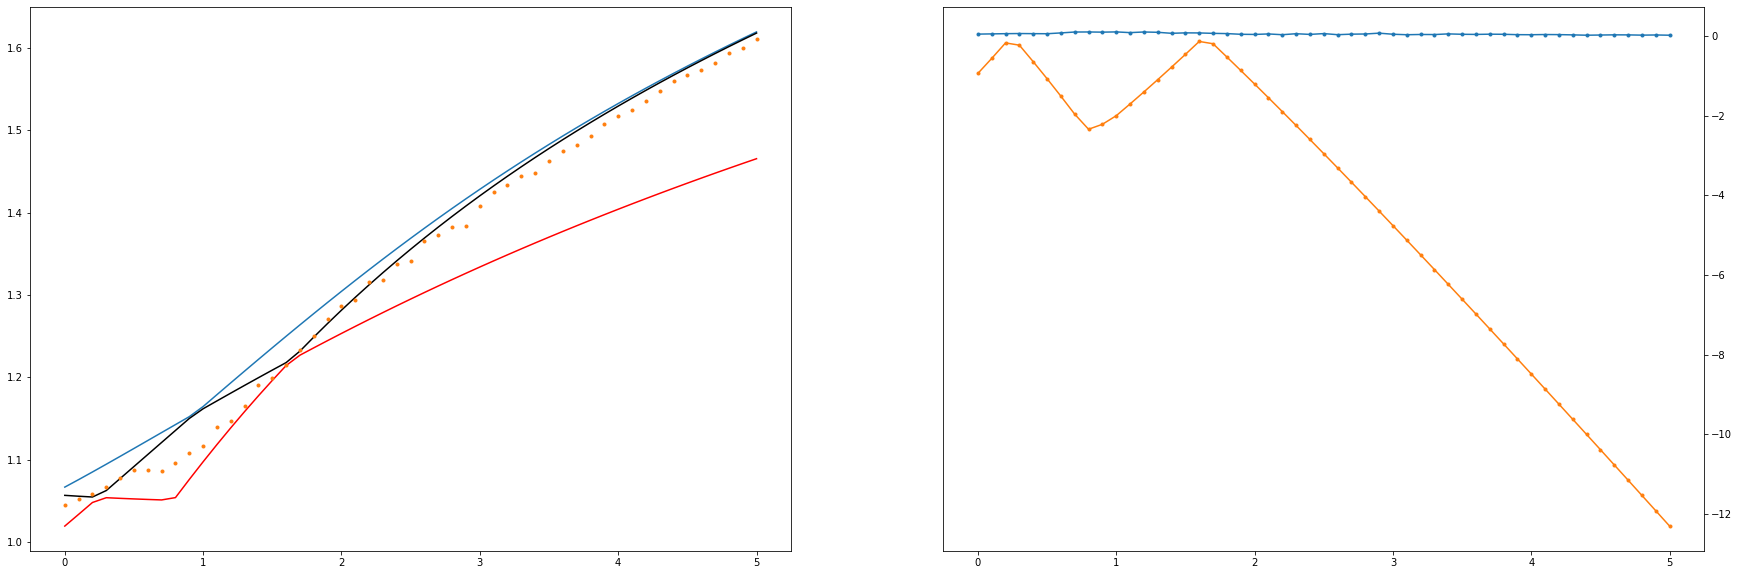

In [129]:
plt.figure(figsize=(30,10))
ax1=plt.subplot2grid((1,2),(0,0))
ax2=plt.subplot2grid((1,2),(0,1))

energies = np.array(energies)
ge = np.array(ge)

ax1.plot(js,np.log10(-np.array(ge)))
ax1.plot(js,np.log10(-np.array(ge1)),color="black")
ax1.plot(js,np.log10(-np.array(ge2)),color="red")

ax1.plot(js,np.log10(-np.array(energies)),'.')
js=np.arange(0,5.1,0.1)
ax2.plot(js, np.abs((ge-energies)/np.array(ge)),'.-')
ax2.plot(js, np.array(ge1)-np.array(ge2),'.-')

#for ind,b in enumerate(energies):
#    ax2.bar(js[ind],(b-ge[ind])/np.abs(ge[ind]))
ax2.yaxis.tick_right() 
plt.savefig("xxz_8qubitsmarco.png")

In [117]:
for ind, k in enumerate(ge):
    if k in ge1:
        print(ind)

In [121]:
np.argmin(np.abs(np.array(ge1)-np.array(ge)))

9

In [13]:
args={"n_qubits":8,"problem_config":{"problem" : "XXZ", "g":1.0, "J": -1}, "specific_name":"XXZ/8Q - J {} g 1.0".format(np.round(j,3))}
#evaluator = Evaluator(args,loading=True)

#VQE module, in charge of continuous optimization
vqe_handler = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"])
obs = vqe_handler.observable

In [17]:
item = obs[10].dense(vqe_handler.qubits)

In [21]:
item.coefficient

(-1+0j)

In [5]:
def give_kr_prod(mat):
    #matrices list of 2 (or more in principle) matrices
    while len(mat) != 1:
        sm, smf=[],[]
        for ind in range(len(mat)):
            sm.append(mat[ind])
            if ind%2==1 and ind>0:
                smf.append(np.kron(*sm))
                sm=[]
        mat = smf
    return mat[0]

In [65]:
kk=[np.kron(*[ind_to_2[str(int(ok))] for ok in string[2*ind:2*(ind+1)]]) for ind in range(int(len(string)/2))]

In [70]:
[[np.kron(*[ok]) for ok in kk[2*ind:2*(ind+1)]] for ind in range(int(len(kk)/2))]

TypeError: _kron_dispatcher() missing 1 required positional argument: 'b'

In [73]:
li = []
for ind,it in range(len(kk)):
    li.append([it]) 
kk

TypeError: 'int' object is not iterable

In [17]:
[ind_to_2[str(int(ok))] for ok in string[:2]]

[array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]]),
 array([[1., 0.],
        [0., 1.]])]

In [18]:
string

array([3, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)